# Python数据分析第二次作业（2024春）
各位同学好！本Jupyter notebook文件包括2024春《Python数据分析》第二次作业的全部题目。<br />
本作业使用Disney的电影数据集。<br />
本数据集经下载整理后包含华特迪士尼影片公司（Walt Disney Pictures, WDP）从1930年代到2020年发行的迪士尼电影数据。<br />

本次作业满分为10分，各题具体分值已在每道题目后给出。作业整体要求具体如下，不符合要求将另外扣分：<br />
1.请将【所有代码和文字】写在本jupyter notebook中，并只在教学网上提交这一个.ipynb文件。命名为【学号-姓名】，例如2300016666-张三.ipynb。<br />
2.请保证提交的notebook可完整运行，提交【按顺序全部运行后】的文件。<br />
3.请保证代码的【可读性】，并适当添加【注释】说明代码功能。<br />
4.部分题目会要求【说明结果】，请用文字对运行结果做简要说明，解释输出内容的含义。<br />
5.本次作业没有“标准答案”，请使用你认为最合理的方式进行可视化，并对结果进行描述和解读。<br />
6.可以使用matplotlib和（或）seaborn，或者其他你喜欢的Python可视化包。

## 数据集字段说明

title-电影名称<br />
Production company-电影制作公司<br />
Country-原产国<br />
Language-以哪种语言呈现的电影<br />
Running time-电影时长（以分钟为单位）<br />
Budget-电影预算（美元）<br />
Box office-电影的票房（美元）<br />
Release date-发布日期（日期时间）<br />
imdb-imbd评分<br />
metascore-metascore（电影的评分）<br />
rotten_tomatoes-烂番茄得分（电影质量）<br />
Directed by-电影导演<br />
Produced by-电影制作<br />
Based on-电影基于的电影<br />
Starring-主演<br />
Music by-电影音乐制作<br />
Distributed by-发行<br />
Cinematography-摄像<br />
Edited by-导演<br />
Screenplay by-编剧<br />

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.3f}'.format


In [2]:
Data=pd.read_csv(r'C:\Users\82107\Desktop\Disney.csv')
Data.drop(columns='Unnamed: 0',inplace=True)
Data

,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Based on,Starring,Music by,Distributed by,Cinematography,Edited by,Screenplay by
0,Academy Award Review of,Walt Disney Productions,United States,English,41.000,NaN,45.472,1937-05-19,7.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,United States,English,83.000,1490000.000,418000000.000,1937-12-21,7.600,95.000,NaN,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Snow White', 'by The', 'Brothers Grimm']","['Adriana Caselotti', 'Lucille La Verne', 'Har...","['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures,NaN,NaN,NaN
2,Pinocchio,Walt Disney Productions,United States,English,88.000,2600000.000,164000000.000,1940-02-07,7.400,99.000,73%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['The Adventures of Pinocchio', 'by', 'Carlo C...","['Cliff Edwards', 'Dickie Jones', 'Christian R...","['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,NaN,NaN,NaN
3,Fantasia,Walt Disney Productions,United States,English,126.000,2280000.000,83300000.000,1940-11-13,7.700,96.000,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,"['Leopold Stokowski', 'Deems Taylor']",See program,RKO Radio Pictures,James Wong Howe,NaN,NaN
4,The Reluctant Dragon,Walt Disney Productions,United States,English,74.000,600000.000,960000.000,1941-06-20,6.900,NaN,68%,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,NaN,"['Robert Benchley', 'Frances Gifford', 'Buddy ...","['Frank Churchill', 'Larry Morey']",RKO Radio Pictures,Bert Giennon,Paul Weatherwax,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,The Little Mermaid,"['Walt Disney Pictures', 'Lucamar Productions'...",United States,English,NaN,NaN,NaN,NaN,7.600,88.000,93%,Rob Marshall,"['Rob Marshall', 'John DeLuca', 'Marc Platt', ...","['Disney', ""'s"", 'The Little Mermaid', 'by', '...","['Halle Bailey', 'Jonah Hauer-King', 'Daveed D...","['Alan Menken (score and songs)', 'Howard Ashm...","['Walt Disney Studios', 'Motion Pictures']",Dion Beebe,Wyatt Smith,"['Jane Goldman', 'David Magee']"
440,Peter Pan & Wendy,"['Walt Disney Pictures', 'Whitaker Entertainme...",United States,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Lowery,"['Jim Whitaker', 'Joe Roth']","[""Disney 's Peter Pan"", 'Peter and Wendy by J....","['Alexander Molony', 'Ever Anderson', 'Jude La...",NaN,Walt Disney Studios Motion Pictures,Bojan Bazelli,NaN,"['David Lowery', 'Toby Halbrooks']"
441,Home Alone,"['20th Century Studios', 'Hutch Parker Enterta...",United States,English,NaN,NaN,NaN,NaN,7.600,63.000,66%,Dan Mazer,"['Hutch Parker', 'Dan Wilson']","['Home Alone', 'by', 'John Hughes']","['Archie Yates', 'Rob Delaney', 'Ellie Kemper'...",John Debney,Disney+,Mitchell Amundsen,NaN,"['Mikey Day', 'Streeter Seidell']"
442,Shrunk,"['Walt Disney Pictures', 'Mandeville Films']",United States,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joe Johnston,"['David Hoberman', 'Todd Lieberman']","['Characters', 'by', 'Stuart Gordon', ',', 'Br...","['Josh Gad', 'Rick Moranis']",NaN,"['Walt Disney Studios', 'Motion Pictures']",NaN,NaN,Todd Rosenberg


# 1. 合作制作的电影一定是大片吗？请进行可视化探索并对结果分别进行解读，请从至少三个合理的角度出发。（3分）

## 请先给出各字段的缺失百分比（保留两位小数）

In [3]:
NAN_percent=Data.isnull().sum()/len(Data)
NAN_percent=NAN_percent.mul(100).round(2).map(lambda x:str(x)+'%')
NAN_percent

title                   0.0%
Production company    10.14%
Country                0.68%
Language               0.23%
Running time           3.15%
Budget                37.39%
Box office            19.37%
Release date           2.03%
imdb                    4.5%
metascore             34.01%
rotten_tomatoes       11.94%
Directed by            0.23%
Produced by            2.03%
Based on              50.23%
Starring               7.88%
Music by               2.48%
Distributed by         0.68%
Cinematography        20.72%
Edited by              9.01%
Screenplay by         54.05%
dtype: object

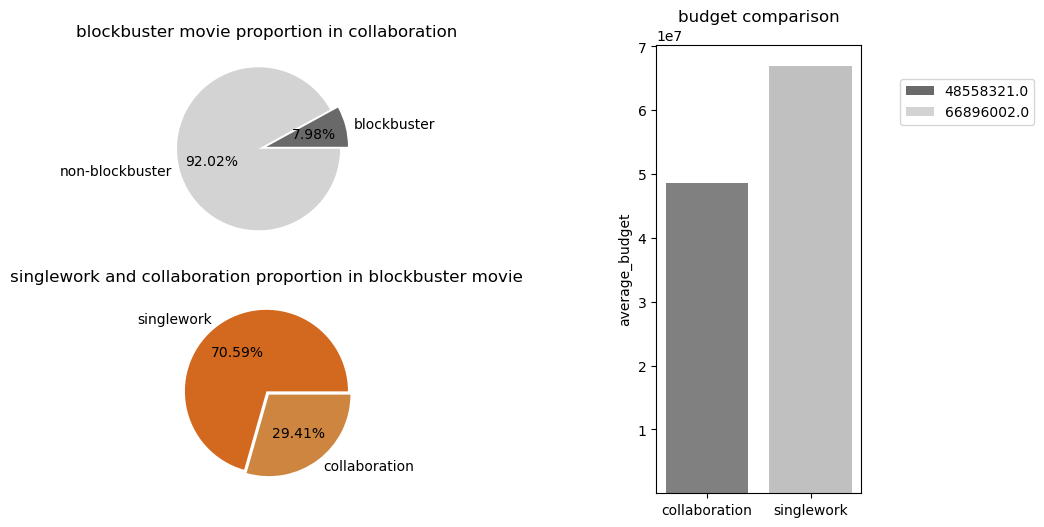

In [4]:
#电影票房4亿（美元）以上的电影或投入的电影预算很多的电影叫大片电影  -维基百科-
#与上所述电影票房4亿（美元）以上的电影会看成大片，因此在这图当中电影票房4亿（美元）以上的电影看成大片
#角度一：合作电影当中，电影票房4亿（美元）以上的电影看成Blockbuster，然后看它的比例
#为了正确的判断先去除缺失值
producer=Data.dropna(subset='Produced by')
#如果producer字段当中包含' , '的话一个电影中会有两个以上的producer。
filter1=producer['Produced by'].str.contains(',')

collaboration=producer[producer['Produced by'].str.contains(',')]
single_work = producer[~filter1]

#为了正确的判断先去除缺失值
collaboration_Boxoffice=collaboration.dropna(subset='Box office')
#与上所述，电影票房4亿（美元）以上的电影可以看成大片，因此通过这一标准来进行分别
blockbuster_Boxoffice_count = collaboration_Boxoffice[collaboration_Boxoffice['Box office']>=400000000].title.nunique()
non_blockbuster_Boxoffice_count=collaboration_Boxoffice[collaboration_Boxoffice['Box office']<400000000].title.nunique()
#为了做圆图，用大片与非大片的数做list
blockbuster_proportion=[blockbuster_Boxoffice_count,non_blockbuster_Boxoffice_count]

#-------------------------------------------------------------------------------------------------------------------------
#角度二：非合作电影预算与合作电影的预算差异（没有特定的预算高低的标准，因此对两种形式的电影进行比较）

#为了正确的判断先去除缺失值
collaboration_Budget=collaboration.dropna(subset='Budget')
single_work_Budget=single_work.dropna(subset='Budget')
#求合作电影的预算与非合作电影的预算
collaboration_mean_budget=collaboration_Budget['Budget'].mean().round(0)
singlework_mean_budget=single_work_Budget['Budget'].mean().round(0)
#为了做圆图，用合作电影平均预算与非合作电影预算平均做list
budget_list=[collaboration_mean_budget,singlework_mean_budget]
#做柱状图的x轴
x_axis=['collaboration','singlework']

#------------------------------------------------------------------------------------------------------------------------
#角度三：大片电影（票房4亿美元以上的电影）中非合作电影与合作电影的比例
all_blockbuster_movies=Data[Data['Box office']>400000000]
#大片电影中分类合作电影与非合作电影
blockbuster_movies_single=all_blockbuster_movies[all_blockbuster_movies['title'].isin(single_work['title'])]
blockbuster_movies_collaboration=all_blockbuster_movies[all_blockbuster_movies['title'].isin(collaboration['title'])]
#为了做圆图，做list
total_blockbuster_movie_proportion=[blockbuster_movies_single.title.nunique(),blockbuster_movies_collaboration.title.nunique()]

#------------------------------------------------------------------------------------------------------------------------
#可视化

gs=GridSpec(3,3)
fig=plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:2,2])

ax1.pie(blockbuster_proportion,labels=['blockbuster','non-blockbuster'],autopct="%.2f%%",colors=['dimgrey','lightgrey'],explode=[0,0.1])
ax1.set_title('blockbuster movie proportion in collaboration')
ax2.pie(total_blockbuster_movie_proportion,labels=['singlework','collaboration'],autopct="%.2f%%",colors=['chocolate','peru'],explode=[0,0.05])
ax2.set_title('singlework and collaboration proportion in blockbuster movie')
ax3.bar(x_axis,budget_list,color=['gray','silver'])
ax3.set_ylabel('average_budget')
ax3.set_title('budget comparison')
ax3.set_yticks([10000000,20000000,30000000,40000000,50000000,60000000,70000000])
fig.legend(budget_list,bbox_to_anchor=(1.1,0.85))
plt.show()


## 电影票房4亿（美元）以上的电影或投入的电影预算很多的电影叫大片电影                 -维基百科-

## 角度一(左上原图）：合作电影当中，电影票房4亿（美元）以上的电影看成Blockbuster，然后看它的比例

#### 与上图可以看出合作电影当中电影票房4亿（美元）以上的电影比例只占7.98%，还有不超过标准的电影占92.02%
#### 从这一结果能看出合作电影不一定是大片电影，反而大部分的电影票房没达到大片电影的标准

## 角度二（柱状图）：非合作电影预算与合作电影的预算差异（没有特定的预算高低的标准，因此对两种形式的电影进行比较
#### 通过上图能看出，非合作电影的预算明显多于合作电影的预算，非合作电影的预算大约比合作电影的预算多1.37倍
#### 从电影的预算角度看，合作电影的预算比非合作电影还差一些，不符合大片电影的标准

## 角度三（左下原图）：大片（超过电影票房4亿（美元））电影当中合作电影的比例
#### 与上图可以看出大片电影当中70%以上是非合作电影，合作电影只占29.41%，如此大片电影中大多数是非合作电影，而不是合作电影。

## 总结
#### 与上三个角度能证明，合作电影不一定是大片电影。

# 2. “叫好不叫座”、“高票房低口碑”的现象存在吗？请从直观的可视化结果和统计分析结果两个角度展开分析，对结果进行解读，且至少包括一个带有数据证据的例子（3分）

### 为了查看分布情况利用散点图看分布情况

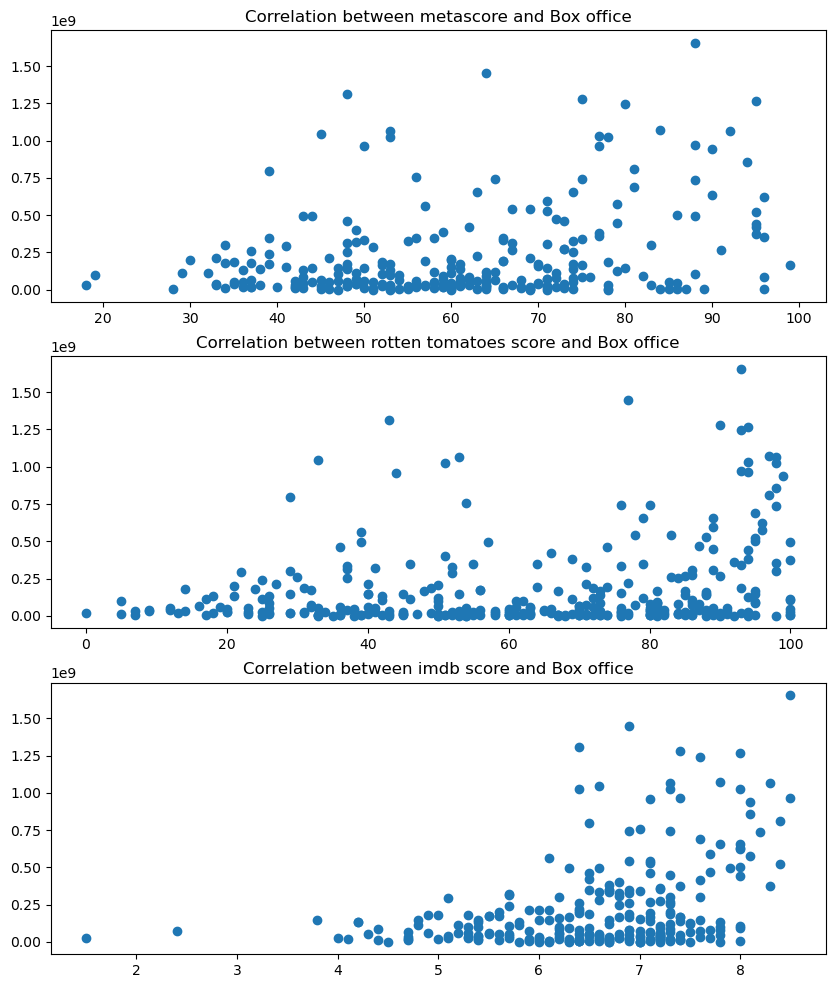

In [5]:
#先去除评分为NAN的行
Data3=Data[['Box office','metascore','rotten_tomatoes','imdb']].dropna(subset=['Box office','metascore','imdb'])
#为了排序，把rotten_tomatoes的值变成实数
Data['rotten_tomatoes']=Data['rotten_tomatoes'].str.replace('%','')
Data_tomato=Data.dropna(subset=['Box office','rotten_tomatoes'])
Data_tomato2=Data_tomato.astype({'rotten_tomatoes':float})
#用fig设画布的大小
fig=plt.figure(figsize=(10,12))
#做3行一列的画布
gs=GridSpec(3,1)
#按各画布的Index设函数
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
#各画布填散点图x轴为评分y轴为收入
ax1.scatter(x=Data3['metascore'],y=Data3['Box office'])
ax1.set_title('Correlation between metascore and Box office')
ax2.scatter(x=Data_tomato2['rotten_tomatoes'],y=Data_tomato2['Box office'])
ax2.set_title('Correlation between rotten tomatoes score and Box office')
ax3.scatter(x=Data3['imdb'],y=Data3['Box office'])
ax3.set_title('Correlation between imdb score and Box office')
ax3.scatter
plt.show()



In [6]:
Data['metascore'].dropna().nlargest(len(Data['metascore'].dropna())//10).tail(1).sum()

86.0

In [7]:
#为了正确的判断去除缺失值
Non_nan_imdb=Data.dropna(subset=['Box office','imdb'])
Non_nan_meta=Data.dropna(subset=['Box office','metascore'])
Non_nan_Box=Data.dropna(subset=['Box office'])
#为了判断收入程度求Box office的平均值
box_office_mean=Non_nan_Box['Box office'].mean()
#假设评分各项目的平均分前10%的电影叫好电影
#求各项目的前10%的标准分
metascore_high_criterion=Non_nan_meta['metascore'].nlargest(len(Non_nan_meta['metascore'])//10).tail(1).sum() #85
rotten_high_criterion=Data_tomato2['rotten_tomatoes'].nlargest(len(Data_tomato2['rotten_tomatoes'])//10).tail(1).sum() #94
imdb_high_criterion=Non_nan_imdb['imdb'].nlargest(len(Data['imdb'])//10).tail(1).sum() #7.5
#求超过按各项目的高标准分的Data
metascore_over_criterion=Non_nan_meta[Non_nan_meta['metascore']>=metascore_high_criterion]
rotten_over_criterion=Data_tomato2[Data_tomato2['rotten_tomatoes']>=rotten_high_criterion]
imdb_over_criterion=Non_nan_imdb[Non_nan_imdb['imdb']>=imdb_high_criterion]
#求在超过高标准分的项目当中超过平均收入的电影数，平均收入以下的电影数
metascore8_above_average=metascore_over_criterion[metascore_over_criterion['Box office']>box_office_mean]['title'].nunique()
metascore8_below_average=metascore_over_criterion[metascore_over_criterion['Box office']<=box_office_mean]['title'].nunique()
rotten_tomatoes_above_average=rotten_over_criterion[rotten_over_criterion['Box office']>box_office_mean]['title'].nunique()
rotten_tomatoes_below_average=rotten_over_criterion[rotten_over_criterion['Box office']<=box_office_mean]['title'].nunique()
imdb_above_average=imdb_over_criterion[imdb_over_criterion['Box office']>box_office_mean]['title'].nunique()
imdb_below_average=imdb_over_criterion[imdb_over_criterion['Box office']<=box_office_mean]['title'].nunique()
#为了形成DataFrame,指定Columns还有输入相应的值
status={'above_average':[metascore8_above_average,rotten_tomatoes_above_average,imdb_above_average],'below_average':[metascore8_below_average,rotten_tomatoes_below_average,imdb_below_average]}
#apply符合的index
jiaohaobujiaozuo=pd.DataFrame(status,index=['metascore','rotten_tomatoes','imdb'])
jiaohaobujiaozuo


,above_average,below_average
metascore,15,10
rotten_tomatoes,19,16
imdb,24,20


Text(0.5, 1.0, 'Box office distribution in highly appreciated movie(imdb)')

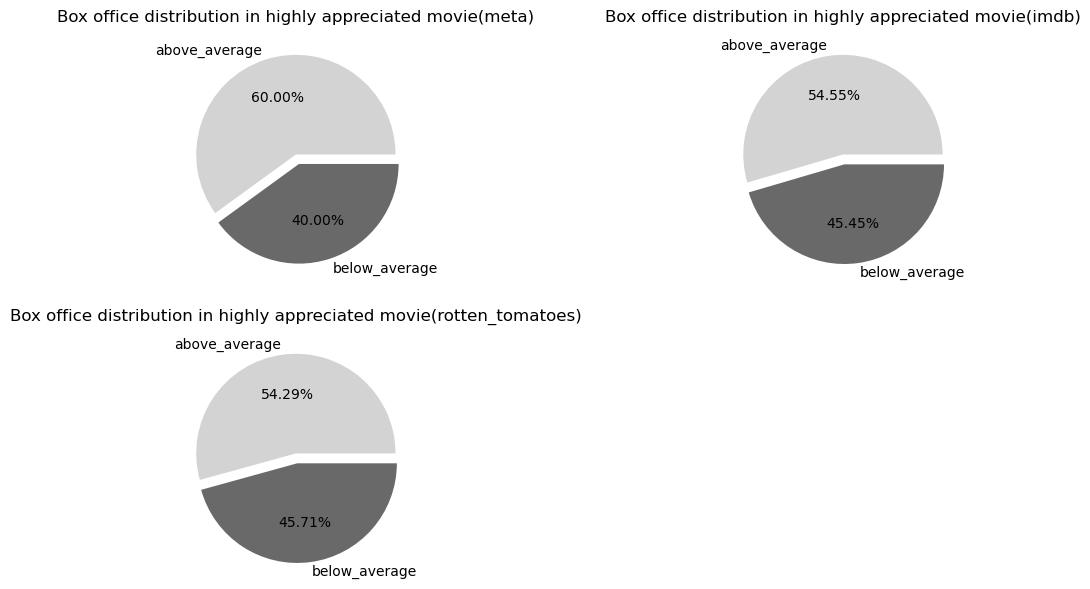

In [8]:
jiaohaobujiaozuo_meta=jiaohaobujiaozuo.iloc[0,:].to_frame()
gs=GridSpec(3,3)
fig=plt.figure(figsize=(20,11))
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1])
ax1.pie([jiaohaobujiaozuo['above_average'][0],jiaohaobujiaozuo['below_average'][0]],labels=['above_average','below_average'],autopct="%.2f%%",colors=['lightgrey','dimgrey'],explode=[0,0.1])
ax1.set_title('Box office distribution in highly appreciated movie(meta)')
ax2.pie([jiaohaobujiaozuo['above_average'][1],jiaohaobujiaozuo['below_average'][1]],labels=['above_average','below_average'],autopct="%.2f%%",colors=['lightgrey','dimgrey'],explode=[0,0.1])
ax2.set_title('Box office distribution in highly appreciated movie(rotten_tomatoes)')
ax3.pie([jiaohaobujiaozuo['above_average'][2],jiaohaobujiaozuo['below_average'][2]],labels=['above_average','below_average'],autopct="%.2f%%",colors=['lightgrey','dimgrey'],explode=[0,0.1])
ax3.set_title('Box office distribution in highly appreciated movie(imdb)')

## 叫好不叫座
#### 从metascore评分指标(左上原图)上能看出，评分为前10%电影当中过平均票房的电影占60%，还有没达到平均票房的电影占40%
#### 从rotten_tomatoes评分指标(左下原图)上能看出，评分为前10%电影当中过平均票房的电影占54.29%，还有没达到平均票房的电影占45.71%
#### 从imdb评分指标(右上原图)上能看出，评分为前10%电影当中过平均票房的电影占54.55%，还有没达到平均票房的电影占45.45%
#### 从这三个图能看出评分为前10%电影当中40%以上的电影没达到平均票房，如此“叫好不叫座”的现象明显存在。



In [9]:
#确认三个评分平台的平均值
print(Data3['metascore'].mean())
print(Data_tomato2['rotten_tomatoes'].mean())
print(Data3['imdb'].mean())


61.17045454545455
62.10149253731343
6.5806818181818185


In [10]:
#求Box_office前10%的标准票房
Box_10per=Non_nan_Box['Box office'].nlargest(len(Non_nan_Box['Box office'])//10).tail(1).sum()
#求Box_office前10%电影的目录
over_high_criterion=Non_nan_Box[Non_nan_Box['Box office']>=Box_10per]
#为了排序，把rotten_tomatoes的值变成实数
over_high_criterion=over_high_criterion.astype({'rotten_tomatoes':float})
#求Box_office前10%电影前10%当中超过平均分的电影比率
imdb_over_percent=(len(over_high_criterion[over_high_criterion['imdb']>=Data3['imdb'].mean()]['imdb'])/len(over_high_criterion))*100
rotten_over_percent=(len(over_high_criterion[over_high_criterion['rotten_tomatoes']>=Data_tomato2['rotten_tomatoes'].mean()]['rotten_tomatoes'])/len(over_high_criterion))*100
meta_over_percent=(len(over_high_criterion[over_high_criterion['metascore']>=Data3['metascore'].mean()]['metascore'])/len(over_high_criterion))*100
status={'over_average_percent':[imdb_over_percent,rotten_over_percent,meta_over_percent]}
pd.DataFrame(status,index=['imdb','rotten_tomatoes','metascore'])


,over_average_percent
imdb,88.571
rotten_tomatoes,74.286
metascore,77.143


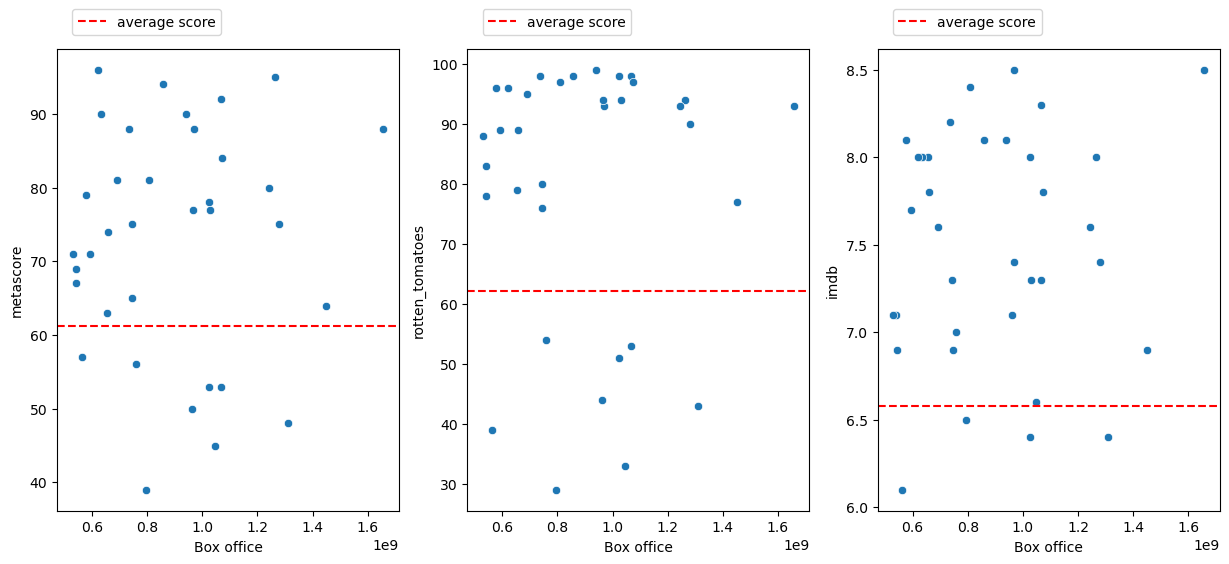

In [11]:
plt.figure(figsize=(15, 6))
#y轴为评分，x轴为票房
plt.subplot(131)
#用红色在y轴上划线到平均值对应的地方划线
plt.axhline(Data3['metascore'].mean(),c='red',ls='--',label='average score')
sns.scatterplot(data=over_high_criterion,x='Box office',y='metascore')
plt.legend(bbox_to_anchor=(0.5,1.1))
plt.subplot(132)
plt.axhline(Data_tomato2['rotten_tomatoes'].mean(),c='red',ls='--',label='average score')
sns.scatterplot(data=over_high_criterion,x='Box office',y='rotten_tomatoes')
plt.legend(bbox_to_anchor=(0.5,1.1))
plt.subplot(133)
plt.axhline(Data3['imdb'].mean(),c='red',ls='--',label='average score')
sns.scatterplot(data=over_high_criterion,x='Box office',y='imdb')
plt.legend(bbox_to_anchor=(0.5,1.1))

## 高票房低口碑
#### 在Metascore评分图标（左散点图）能看出票房前10%电影当中存在没达到平均分的电影总共8片，占22.86%
#### 在rotten_tomatoes评分图标（中间散点图）能看出票房前10%电影当中存在没达到平均分的电影总共8片，占25.72%
#### 在meta_score评分图标（右散点图）能看出票房前10%电影当中存在没达到平均分的电影总共4片，占11.43%

### 总而言之，与上图可以看出票房前10%电影当中大部分电影的评分过平均分，但存在一些没达到平均分的电影，在metascore,rotten_tomatoes这两个平台这一现象比较明显,还有imdb这一平台上比较隐约

# 3. 哪些导演（'Directed by'）拍的电影的平均评价最高？(2分）

In [12]:
#除去缺失值
Non_nan_director=Data.dropna(subset='Directed by')
#如果Directed字段当中包含' , '的话一个电影中会有两个以上的Director。
filter3=Non_nan_director['Directed by'].str.contains(',')
#为了拆开，分类Director为两人以上的电影，Director为单人的电影
directors=Non_nan_director[filter3]
director=Non_nan_director[~filter3]

director=director.astype({'rotten_tomatoes':float})
#为了拆开字段变成list
directors['Directed by']=directors['Directed by'].apply(lambda x: eval(x))
#进行拆开
directors=directors.explode('Directed by')
directors=directors.astype({'rotten_tomatoes':float})
#合并两个DataFrame
all_Director=pd.concat([director,directors],axis=0)
all_Director=all_Director.reset_index(drop=True)
#Directed by'列当中存在不是导演名的值，而是一些关于导演的说明，如:(supervising),因此去除这些值
all_Director=all_Director.drop(all_Director[all_Director['Directed by'].str.startswith('(')].index)
#求'rotten_tomatoes'中平均评分为前5的Directors
all_Director_rotten=all_Director.groupby('Directed by')['rotten_tomatoes']
all_Director_rotten=all_Director_rotten.mean().to_frame().sort_values(by='rotten_tomatoes',ascending=False).reset_index()
all_Director_rotten5=all_Director_rotten.head()
#求'metascore'中平均评分为前5的Directors
all_Director_meta=all_Director.groupby('Directed by')['metascore']
all_Director_meta=all_Director_meta.mean().to_frame().sort_values(by='metascore',ascending=False).reset_index()
all_Director_meta5=all_Director_meta.head()
#求'metascore'中平均评分为前5的Directors
all_Director_imdb=all_Director.groupby('Directed by')['imdb']
all_Director_imdb=all_Director_imdb.mean().to_frame().sort_values(by='imdb',ascending=False).reset_index()
all_Director_imdb5=all_Director_imdb.head()
#求两个平台的平均分
non_nan_all_Director=all_Director.dropna(subset=['metascore','rotten_tomatoes'])
non_nan_all_Director['mean']=non_nan_all_Director[['metascore','rotten_tomatoes']].mean(axis=1)
#求rotten_tomatoes'，'metascore'中平均评分为前5的Directors
all_Director_rotten_meta=non_nan_all_Director.groupby('Directed by')['mean']
all_Director_rotten_meta=all_Director_rotten_meta.mean().to_frame().sort_values(by='mean',ascending=False).reset_index()
all_Director_rotten_meta5=all_Director_rotten_meta.head()




0       David D. Hand
1         Jim Handley
2          Ford Beebe
3         Bill Condon
4    Samuel Armstrong
Name: Directed by, dtype: object

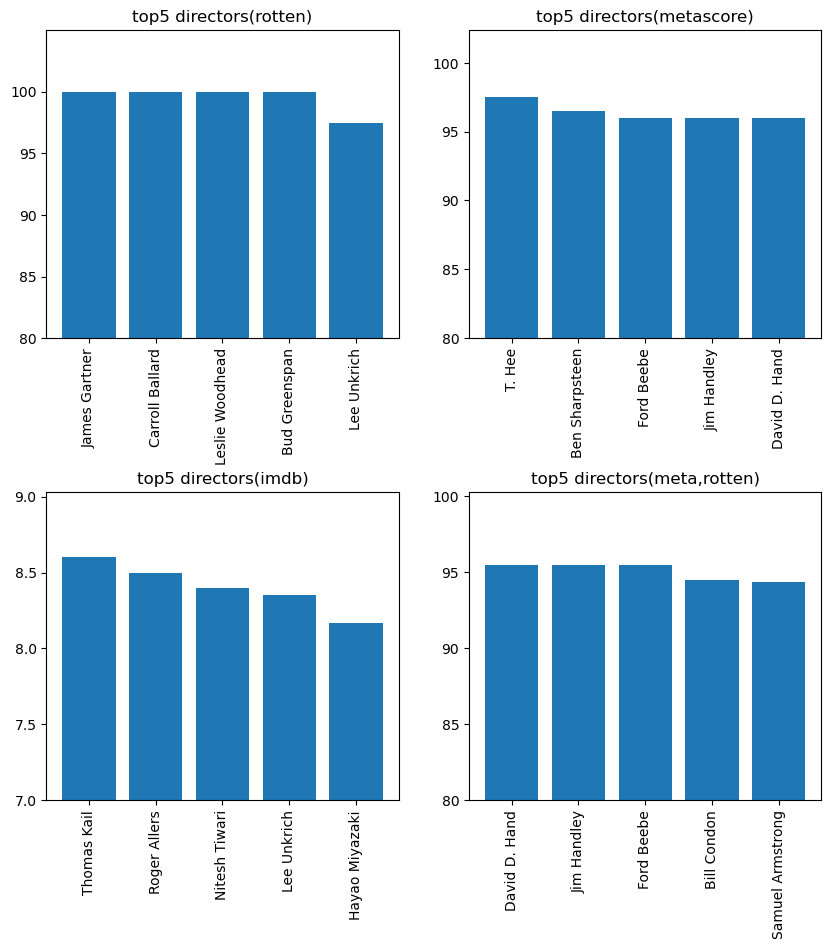

In [13]:
#可视化
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(224)
plt.bar(all_Director_rotten_meta5['Directed by'],all_Director_rotten_meta5['mean'].to_list())
plt.xticks(rotation="vertical")
plt.title('top5 directors(meta,rotten)')
plt.ylim(ymin=80)
plt.yticks([80,85,90,95,100])
plt.subplot(221)
plt.bar(all_Director_rotten5['Directed by'],all_Director_rotten5['rotten_tomatoes'].to_list())
plt.xticks(rotation="vertical")
plt.ylim(ymin=80)
plt.yticks([80,85,90,95,100])
plt.title('top5 directors(rotten)')
plt.subplot(222)
plt.bar(all_Director_meta5['Directed by'],all_Director_meta5['metascore'].to_list())
plt.xticks(rotation="vertical")
plt.ylim(ymin=80)
plt.yticks([80,85,90,95,100])
plt.title('top5 directors(metascore)')
plt.subplot(223)
plt.bar(all_Director_imdb5['Directed by'],all_Director_imdb5['imdb'].to_list())
plt.xticks(rotation="vertical")
plt.ylim(ymin=7)
plt.yticks([7,7.5,8,8.5,9])
plt.title('top5 directors(imdb)')
all_Director_rotten_meta5['Directed by']

## 从上图可以看出各平台的平均评价最高的导演有哪些
#### 在rotten_tomatoes平均评价最高的导演有4位 James Gartner，Carroll Ballard，Leslie Woodhead，Bud Greenspan
#### 在metascore平均评价最高的导演是 T. Hee
#### 在imdb平均评价最高的导演是 Thomas Kail
#### 在rotten_tomatoes，metascore这两个平台上平均评价最高的导演有3位 David D. Hand，Jim Handley，Ford Beebe

# 4. 请找出指导作品最多的导演（'Directed by'）。请用直观的可视化方法，对比展示他所有的作品与其他人作品在支出（预算）、收入（票房）上的差异（2分）

# 请先使用删去不存在收入支出的数据。

In [14]:
#确认指导作品最多的导演
all_Director['Directed by'].value_counts()

Directed by
Robert Stevenson         19
Norman Tokar             15
James Algar              13
Hamilton Luske           12
Vincent McEveety         12
                         ..
Steve "Spaz" Williams     1
Gábor Csupó               1
Frederik Du Chau          1
Leslie Iwerks             1
Jared Bush                1
Name: count, Length: 338, dtype: int64

In [15]:
#除去缺失值
all_Director_non_nan_box=all_Director.dropna(subset=(['Budget','Box office']))
#求指导作品最多的导演的平均支出与收入
prolific_Director=all_Director_non_nan_box[all_Director_non_nan_box['Directed by']=='Robert Stevenson']
prolific_Director_df=prolific_Director[['Budget','Box office']].mean().to_frame()
prolific_Director_df

,0
Budget,4825001.100
Box office,45566000.000


In [16]:
#求其他导演的平均支出与收入
Other_Directors=all_Director_non_nan_box[all_Director_non_nan_box['Directed by']!='Robert Stevenson']
Other_Directors_df=Other_Directors[['Budget','Box office']].mean().to_frame()
Other_Directors_df


,0
Budget,49076401.061
Box office,219468216.595


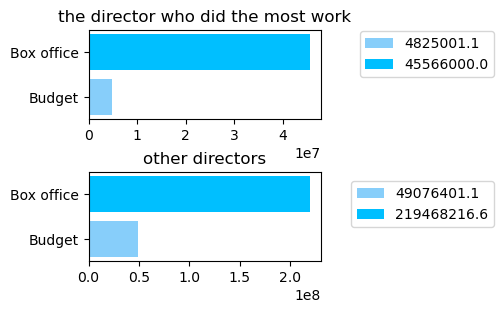

In [17]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(3,3))
plt.subplots_adjust(hspace=0.6)
l1=ax1.barh(prolific_Director_df.index,[prolific_Director_df.iloc[0,0],prolific_Director_df.iloc[1,0]],color=['lightskyblue','deepskyblue'])
ax1.set_title('the director who did the most work')
l2=ax2.barh(Other_Directors_df.index,[Other_Directors_df.iloc[0,0],Other_Directors_df.iloc[1,0]],color=['lightskyblue','deepskyblue'])
ax2.set_title('other directors')
fig.legend((l1),[prolific_Director_df.iloc[0,0],prolific_Director_df.iloc[1,0]],bbox_to_anchor=(1.5,0.9))
fig.legend((l2),[round(Other_Directors_df.iloc[0,0],1),round(Other_Directors_df.iloc[1,0],1)],bbox_to_anchor=(1.5,0.4))

## 指导作品最多的导演所有的作品与其他人作品在支出（预算）、收入（票房）上的差异

#### 首先，指导作品最多的导演的作品的平均支出为4825001.1(美元)，还有指导作品最多的导演的作品的平均收入为45566000(美元) 大约电影预算的9.44倍
#### 其次，其他导演的作品的平均支出为49076401.1(美元),其他导演的电影的平均收入为219468216.6(美元) 大约电影预算的 4.47倍，他们的投资与收入的比率相差2倍以上
#### 由此可见，指导作品最多的导演的投资对比收益率明显比其他导演高